## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches
import pandas as pd

In [2]:
# Set seed for replicability
import random
random.seed(1234)

In [3]:
# Define hex codes for some nice plot colors
mpl_blue = '#1f77b4'
mpl_orange = '#ff7f0e'
mpl_green = '#2ca02c'

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [4]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [5]:
cards = sample_cards(100, 6, 3)
cards

array([[15, 32, 86],
       [57, 77, 94],
       [29, 58, 95],
       [18, 39, 60],
       [26, 71, 97],
       [ 4, 74, 99]])

and access the cards of each player with 

In [6]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([15, 32, 86]), array([57, 77, 94]))

The lowest card in the game is

In [7]:
np.min(cards)

4

This function creates a sequence of values from start (1) to stop (5) minus 1. 

In [8]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

In [9]:
# Make 100K draws
card_draws = [sample_cards(100, 6, 3) for _ in range(100000)]
card_draws

[array([[24, 52, 92],
        [31, 95, 99],
        [41, 42, 43],
        [75, 85, 96],
        [19, 36, 97],
        [ 2, 73, 79]]),
 array([[49, 76, 90],
        [12, 39, 94],
        [23, 27, 42],
        [ 2, 20, 34],
        [24, 58, 95],
        [53, 68, 80]]),
 array([[33, 64, 68],
        [54, 78, 79],
        [ 5,  6, 56],
        [12, 47, 48],
        [18, 49, 72],
        [ 3, 57, 67]]),
 array([[34, 44, 84],
        [31, 76, 79],
        [36, 43, 71],
        [45, 60, 70],
        [12, 14, 19],
        [15, 18, 73]]),
 array([[74, 85, 97],
        [13, 53, 75],
        [29, 63, 89],
        [14, 83, 94],
        [16, 26, 48],
        [20, 30, 68]]),
 array([[ 10,  22,  31],
        [  9,  13,  98],
        [  8,  49,  64],
        [ 62,  84, 100],
        [ 21,  66,  87],
        [ 11,  74,  88]]),
 array([[  4,  29,  99],
        [ 40,  48,  81],
        [  2,  34,  63],
        [ 15,  45,  79],
        [ 51,  82, 100],
        [ 33,  50,  65]]),
 array([[26, 58, 76],
    

In [10]:
# Get minimum for each draw. Loop over draws, take array minimum
draw_minimums = [np.min(a) for a in card_draws]
draw_minimums

[2,
 2,
 3,
 12,
 13,
 8,
 2,
 6,
 6,
 3,
 4,
 1,
 7,
 1,
 1,
 8,
 9,
 4,
 2,
 21,
 6,
 1,
 1,
 2,
 5,
 7,
 1,
 10,
 8,
 3,
 6,
 2,
 2,
 7,
 1,
 2,
 7,
 10,
 1,
 4,
 11,
 2,
 9,
 10,
 1,
 3,
 2,
 1,
 7,
 1,
 10,
 7,
 12,
 1,
 10,
 1,
 2,
 20,
 4,
 5,
 6,
 3,
 3,
 1,
 3,
 3,
 16,
 3,
 17,
 9,
 10,
 1,
 3,
 4,
 7,
 8,
 3,
 3,
 16,
 1,
 5,
 3,
 2,
 7,
 4,
 4,
 6,
 25,
 5,
 6,
 8,
 1,
 10,
 3,
 3,
 5,
 12,
 6,
 5,
 4,
 3,
 11,
 8,
 12,
 2,
 9,
 1,
 3,
 2,
 16,
 2,
 6,
 12,
 1,
 6,
 3,
 7,
 4,
 4,
 3,
 1,
 5,
 16,
 6,
 3,
 5,
 3,
 3,
 13,
 3,
 3,
 1,
 2,
 21,
 5,
 7,
 3,
 7,
 9,
 3,
 15,
 15,
 3,
 7,
 3,
 6,
 4,
 12,
 7,
 1,
 5,
 4,
 17,
 7,
 3,
 4,
 3,
 3,
 4,
 5,
 1,
 2,
 6,
 6,
 2,
 8,
 2,
 18,
 1,
 4,
 3,
 5,
 4,
 3,
 1,
 9,
 19,
 19,
 13,
 5,
 5,
 9,
 3,
 5,
 4,
 12,
 3,
 8,
 7,
 11,
 2,
 2,
 1,
 3,
 3,
 5,
 4,
 2,
 2,
 15,
 2,
 6,
 1,
 2,
 7,
 8,
 21,
 2,
 4,
 2,
 10,
 2,
 8,
 1,
 1,
 3,
 7,
 6,
 8,
 3,
 2,
 1,
 9,
 10,
 7,
 8,
 3,
 1,
 1,
 3,
 31,
 13,
 9,
 1,
 11,
 8,
 11,
 32,
 7,


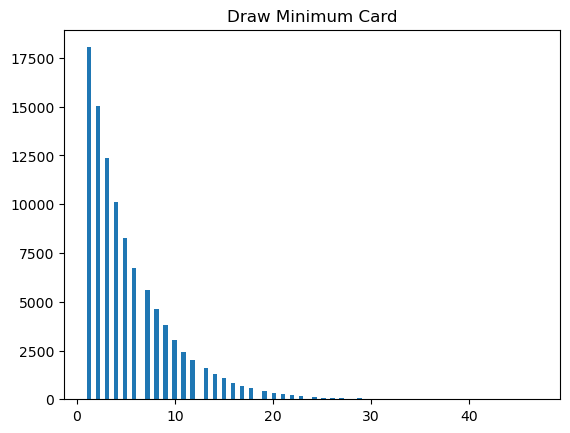

In [11]:
# Histogram, N bins for N cards available
plt.hist(draw_minimums, bins = 100)
# Title
plt.title('Draw Minimum Card')
# Show plot
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, find the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [12]:
# Function: Given a game/draw of cards, compute the maximum gap between consecutive cards
def get_max_consecutive_gap(cards):
    # Flatten array to one dimension
    flat_cards = cards.flatten()
    # Get the ordered list of indices that would sort flat_cards
    order_ids = np.argsort(flat_cards)
    # Compute differences between between consecutively ordered cards
    gap_cards = np.diff(flat_cards[order_ids])
    # Return maximum gap between between ordered cards
    return np.max(gap_cards)

In [13]:
# Test function on a known result
# player 1: {30, 90}
# player 2: {2, 25}
test_cards = np.array([[30, 90], [2, 25]])
print(test_cards)
# Should be 60
print(get_max_consecutive_gap(test_cards))

[[30 90]
 [ 2 25]]
60


Repeat the experiment but now compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [14]:
# Function: Given a game/draw of cards, compute the maximum gap between consecutive cards from different players
# Similar to the earlier function, except that we now keep track of and test differences in player ids, keeping non-zero ones
def get_max_consecutive_gap_between_players(cards):
    # Number of players (n) is the number of rows
    num_players = np.shape(cards)[0]
    # Number of cards per player (k) is the number of columns
    num_cards_per_player = np.shape(cards)[1]
    # Create a template with the same shape as the cards, but with player id numbers for tracking after sorting
    # arange creates an array of the player ids ([1, 2, 3, 4, 5, 6], etc.)
    # tile repeats the array k/num_cards times, each time on a new row (since we passed k as a row argument, 1 as col argument)
    # We transpose the result to match the card array shape
    player_ids = np.tile(np.arange(1, num_players + 1), (num_cards_per_player, 1)).T
    # Flatten arrays to one dimension
    flat_cards, flat_ids = cards.flatten(), player_ids.flatten()
    # Get the ordered list of indices that would sort flat_cards
    order_ids = np.argsort(flat_cards)
    # Compute differences between consecutively ordered cards
    gap_cards = np.diff(flat_cards[order_ids])
    # Compute gap in ids as well so we can see if the gap is between players with the same id
    gap_ids = np.diff(flat_ids[order_ids])
    # Set the gap to 0 when it is within the same player
    # Element wise multiplication of gap_cards with an array of indicators for whether the gap is between cards of the same player
    gap_unique = gap_cards * (gap_ids != 0)
    # Return maximum gap between players
    return np.max(gap_unique)

In [15]:
# Testing the function on a known result
test_cards = np.array([[50, 75, 78], [15, 21, 46], [14, 39, 77], [63, 70, 96], [19, 26, 33]])
print(test_cards)
# Should be 18
print(get_max_consecutive_gap_between_players(test_cards))

[[50 75 78]
 [15 21 46]
 [14 39 77]
 [63 70 96]
 [19 26 33]]
18


In [16]:
# Test function on a known result
# player 1: {30, 90}
# player 2: {2, 25}
test_cards = np.array([[30, 90], [2, 25]])
print(test_cards)
# Should be 5
print(get_max_consecutive_gap_between_players(test_cards))

[[30 90]
 [ 2 25]]
5


How do these compare? 

In [17]:
# Compute max gaps under both methods in our original card draws (card_draws)
all_cards_max_gaps = [get_max_consecutive_gap(cards) for cards in card_draws]
between_players_max_gaps = [get_max_consecutive_gap_between_players(cards) for cards in card_draws]

In [18]:
# Going to check the mean
print('mean max gap considering all cards:')
print(np.mean(all_cards_max_gaps))
print('mean max gap considering only between players:')
print(np.mean(between_players_max_gaps))

mean max gap considering all cards:
16.9597
mean max gap considering only between players:
16.36171


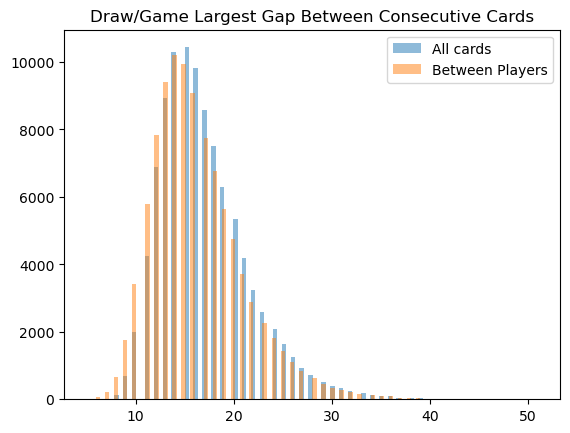

In [19]:
# Overlaid histogram
plt.hist(all_cards_max_gaps, bins = 100, alpha = 0.5, label = 'All cards')
plt.hist(between_players_max_gaps, bins = 100, alpha = 0.5, label = 'Between Players')
plt.title('Draw/Game Largest Gap Between Consecutive Cards')
plt.legend(loc = 'upper right')
plt.show()

Answer: Gaps are slightly larger when we consider all card comparisons, not just those between players, though they are close.

Run simulations for different choices of the number of cards and players and see when the difference between these two is larger.

Compute the mean of the two distributions. When is this difference larger? How does this depends of the total number of players `n`?

In [20]:
# Lists of N, n, and k to try
# - N : Total number of cards
# - n : Number of players
# - k : Number of cards per player
N_to_try = [50, 100, 200]
n_to_try = [3, 6, 10]
k_to_try = [2, 3, 5]

# Empty dataframe to store results
# For now, going to store the means
means_df = pd.DataFrame(columns=['N', 'n', 'k', 'All Comparisons Mean', 'Between Player Mean'])

# Create list of 100 draws for each combination of N, n, k
for N in N_to_try:
    for n in n_to_try:
        for k in k_to_try:
            # Create 100K draws
            parameter_draws = [sample_cards(N, n, k) for _ in range(100000)]
            # List of max gaps with an entry for each of the 100 draws
            ac_max_gaps = [get_max_consecutive_gap(cards) for cards in parameter_draws]
            bp_max_gaps = [get_max_consecutive_gap_between_players(cards) for cards in parameter_draws]
            # Compute means
            mean_ac = np.mean(ac_max_gaps)
            mean_bp = np.mean(bp_max_gaps)
            # Add parameters and means to dataframe
            means_df = pd.concat([means_df, pd.DataFrame([[N, n, k, mean_ac, mean_bp]], columns=['N', 'n', 'k', 'All Comparisons Mean', 'Between Player Mean'])])

# Add difference in means as a column
means_df['AC minus BP'] = means_df['All Comparisons Mean'] - means_df['Between Player Mean']

C:\Users\ijyli\AppData\Local\Temp\ipykernel_5740\1321053267.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  means_df = pd.concat([means_df, pd.DataFrame([[N, n, k, mean_ac, mean_bp]], columns=['N', 'n', 'k', 'All Comparisons Mean', 'Between Player Mean'])])


In [21]:
# Sort by N, k, then n to see the impact of n
means_df.sort_values(by=['N', 'k', 'n'])

,N,n,k,All Comparisons Mean,Between Player Mean,AC minus BP
0,50,3,2,15.96651,14.46755,1.49896
0,50,6,2,10.76687,10.44314,0.32373
0,50,10,2,7.19495,7.09591,0.09904
0,50,3,3,12.93931,11.65703,1.28228
0,50,6,3,7.88567,7.61576,0.26991
0,50,10,3,4.74670,4.67101,0.07569
0,50,3,5,9.13787,8.25593,0.88194
0,50,6,5,4.73882,4.57675,0.16207
0,50,10,5,1.00000,1.00000,0.00000
0,100,3,2,32.29907,29.19479,3.10428


We can see that (when holding the other variables constant) the difference in mean maximum gaps is largest when number of players `n` is low. When there are few players, limiting to gaps in between players has a large effect, as many more gaps between cards are not allowed when calculating the max.

(Sidenote: The game is deterministic when `N = n*k`. Gaps between consecutive cards are always 1. The maximum gap in all cases, between player or not, is then 1.)

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

If we modify our draw of cards for the game to be with replacement, the number of cards above `N/2` will be distributed binomial. The binomial parameter `n` is the number of cards in play (`n*k` for our card game sampling). A card is above `N/2` with probability `p = 1/2`.

In [29]:
# Here I modify the card sampling to be with replacement
def sample_cards_w_replacement(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

In [30]:
# Vector to store number of cards over N/2
game_num_cards_over = []
# Run 100K new games
for _ in range(100000):
    # Sample with replacement!
    new_game = sample_cards_w_replacement(100, 6, 3)
    # Count cards over N/2
    num_cards_over_N_over_2 = len([card for card in new_game.flatten() if card > (100 / 2)])
    # Append to list
    game_num_cards_over.append(num_cards_over_N_over_2)

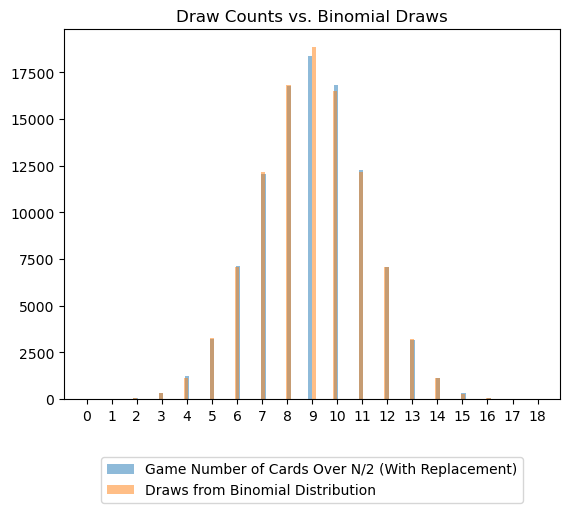

In [33]:
# Numpy distribution to compare to
actual_bin = np.random.binomial(n = 18, p = 0.5, size = 100000)
# Overlaid histogram
plt.hist(game_num_cards_over, bins = 100, alpha = 0.5, label = 'Game Number of Cards Over N/2 (With Replacement)')
plt.hist(actual_bin, bins = 100, alpha = 0.5, label = 'Draws from Binomial Distribution')
# X ticks for possible values for the number of cards over N/2
plt.xticks(range(0, 19))
plt.title('Draw Counts vs. Binomial Draws')
plt.legend(bbox_to_anchor =(0.5,-0.3), loc='lower center')
plt.show()

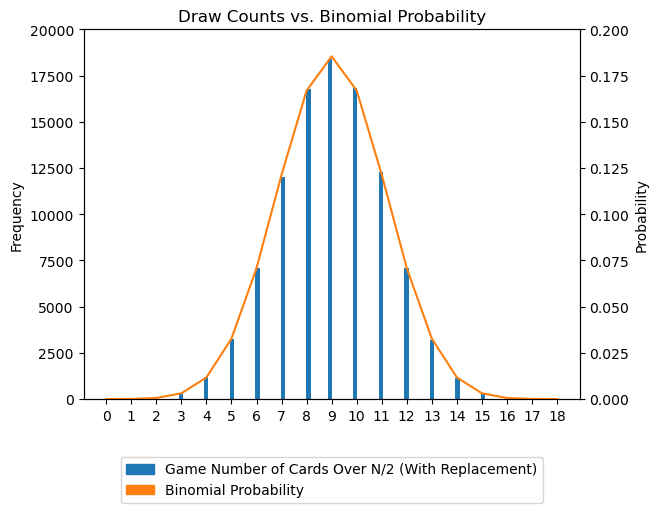

In [37]:
# Scipy pmf to compare to
x = range(0, 19)
pmf = stats.binom.pmf(x, 18, 0.5)
# Overlaid plot with two axes, appropriate labels and axis titles
fig, ax1 = plt.subplots()
ax1.hist(game_num_cards_over, bins = 100, color = mpl_blue)
# We need to set ylim for both axes to ensure they line up
ax1.set_ylim(0, 20000)
ax1.set_ylabel('Frequency')
ax2 = ax1.twinx()
ax2.plot(x, pmf, color = mpl_orange)
ax2.set_ylim(0, 0.2)
ax2.set_ylabel('Probability')
plt.xticks(range(0, 19))
plt.title('Draw Counts vs. Binomial Probability')
patch_1 = mpatches.Patch(color=mpl_blue, label = 'Game Number of Cards Over N/2 (With Replacement)')
patch_2 = mpatches.Patch(color=mpl_orange, label = 'Binomial Probability')
plt.legend(handles=[patch_1, patch_2], bbox_to_anchor =(0.5,-0.3), loc='lower center')
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution follow a Beta distribution. While here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$-th order statistic of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

Note our draw minimums from Part 1 were without replacement, so the approximation will not be exact.

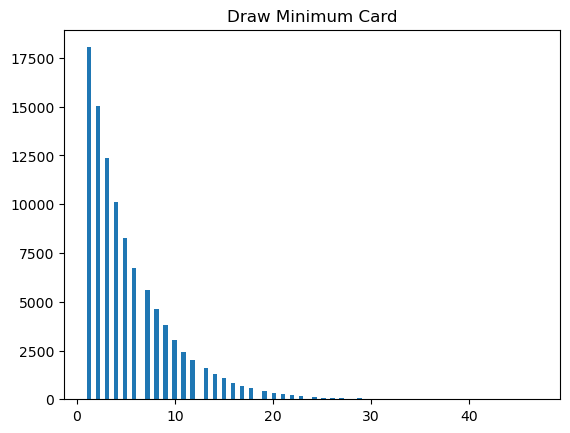

In [27]:
# Repeat plot from part 1
# Histogram, N bins for N cards available
plt.hist(draw_minimums, bins = 100)
# Title
plt.title('Draw Minimum Card')
# Show plot
plt.show()

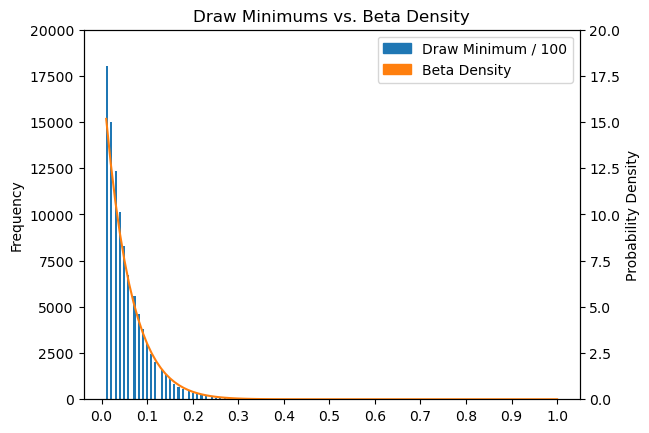

In [39]:
# Scipy pdf to compare to
# We are looking for the 1st order statistic (1st smallest value), so in the beta k = 1
beta_k = 1
# In part 1 our sample was of size n*k = 18, so in the beta n = 18
beta_n = 18
# X values for the beta pdf
x = np.linspace(0.01, 1, 100)
pdf = stats.beta.pdf(x, a = beta_k, b = beta_n + 1 - beta_k)
# Overlaid plot with two axes, appropriate labels and axis titles
fig, ax1 = plt.subplots()
# Divide draw_minimums data by 100 to match the scale of the beta pdf (1 to 100 now becomes 0.01 to 1... not exactly 0 to 1 but close enough)
ax1.hist([min / 100 for min in draw_minimums], bins = 100, color = mpl_blue)
ax1.set_ylabel('Frequency')
# We need to set ylim for both axes to ensure they line up
ax1.set_ylim(0, 20000)
ax2 = ax1.twinx()
ax2.plot(x, pdf, color = mpl_orange)
ax2.set_ylabel('Probability Density')
ax2.set_ylim(0, 20)
plt.xticks(np.linspace(0, 1, 11))
plt.title('Draw Minimums vs. Beta Density')
patch_1 = mpatches.Patch(color=mpl_blue, label = 'Draw Minimum / 100')
patch_2 = mpatches.Patch(color=mpl_orange, label = 'Beta Density')
plt.legend(handles=[patch_1, patch_2])
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

Again, note our draw minimums from Part 1 we without replacement, so the approximation will not be exact.

In [40]:
# For our draws from part 1, use min number in the sample to calculate transformed variable X
# N = 100
X_vals = [- np.log(1 - (sample_min / 100)) for sample_min in draw_minimums]

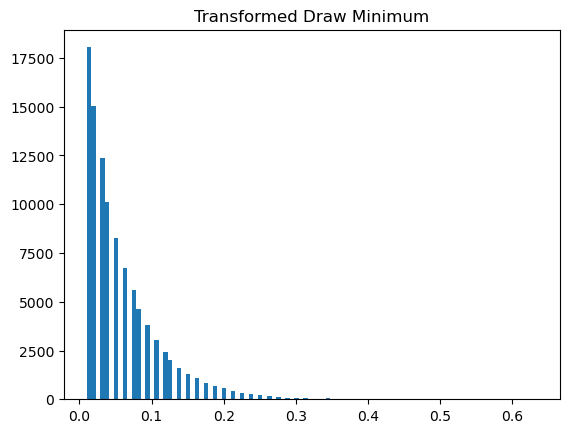

In [41]:
# Plot distribution
plt.hist(X_vals, bins = 100)
# Title
plt.title('Transformed Draw Minimum')
plt.show()

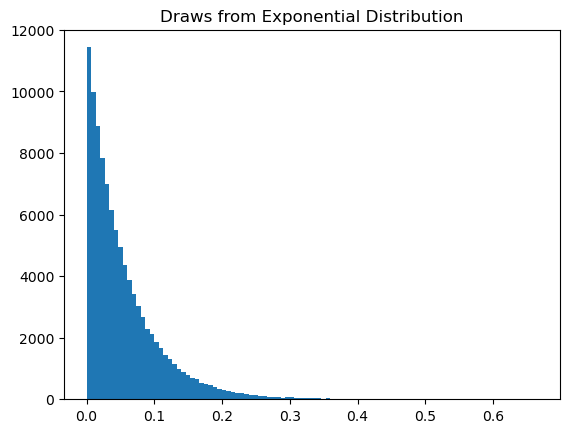

In [42]:
# Plot 100K exponential draws with parameter n*k (6*3 = 18 in our initial game)
# We invert the parameter to comply with numpy's implementation
actual_expo = np.random.exponential(scale = (1 / (6 * 3)), size = 100000)
# Plot distribution
plt.hist(actual_expo, bins = 100)
# Title
plt.title('Draws from Exponential Distribution')
plt.show()

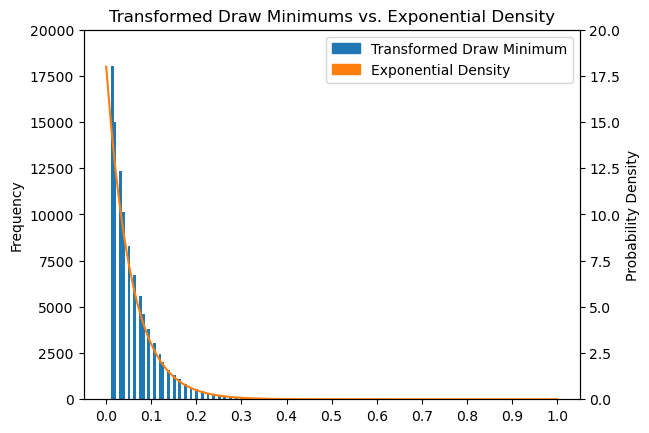

In [44]:
# Scipy pdf to compare to
# X values for the exponential pdf
x = np.linspace(0, 1, 101)
# Exponential pdf with parameter n*k (6*3 = 18 in our initial game)
# We invert the parameter to comply with scipy's implementation
pdf = stats.expon.pdf(x, scale = (1 / (6 * 3)))
# Overlaid plot with two axes, appropriate labels and axis titles
fig, ax1 = plt.subplots()
ax1.hist(X_vals, bins = 100, color = mpl_blue)
ax1.set_ylabel('Frequency')
# We need to set ylim for both axes to ensure they line up
ax1.set_ylim(0, 20000)
ax2 = ax1.twinx()
ax2.plot(x, pdf, color = mpl_orange)
ax2.set_ylabel('Probability Density')
ax2.set_ylim(0, 20)
plt.xticks(np.linspace(0, 1, 11))
plt.title('Transformed Draw Minimums vs. Exponential Density')
patch_1 = mpatches.Patch(color=mpl_blue, label = 'Transformed Draw Minimum')
patch_2 = mpatches.Patch(color=mpl_orange, label = 'Exponential Density')
plt.legend(handles=[patch_1, patch_2])
plt.show()

### 4. What happens when $n * k << N$?

Some of the distributions we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without replacement compare as $n * k << N$. What do you expect to see in these cases? When will the difference between the two sampling strategies lead to similar or different results?

We expect to see convergence of sampling with and without replacement when $n * k << N$. When N is large removing a number from the potential outcomes for a draw when you sample without replacement does not have much of an impact on overall probabilities. Here I keep `n*k` fixed and increase `N`.

For the binomial distribution of the number of cards above `N/2`, we see that the distributions converge as `N` increases. The draws without replacement initially place a large mass at `N/2` for low `N` - the cards in play are forced to be symmetric. At this stage the draws with replacement don't really take on a distinctive shape either - the sample size is too small. However, as `N` increases, both distributions spread out and converge to the expected binomial shape.

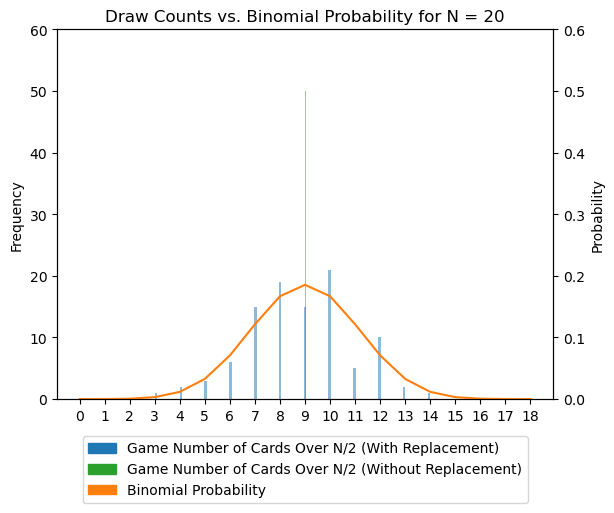

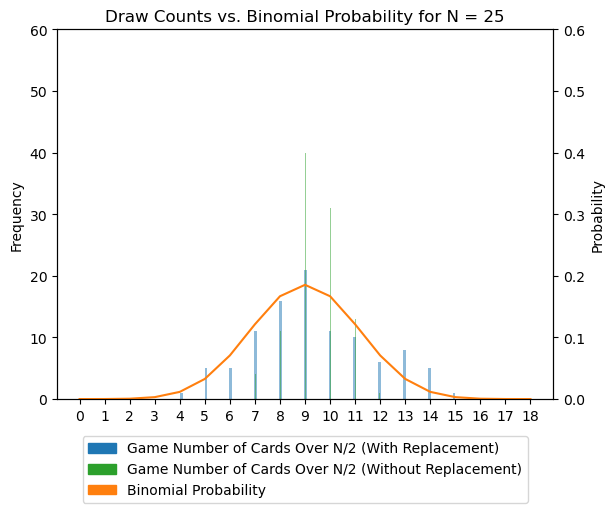

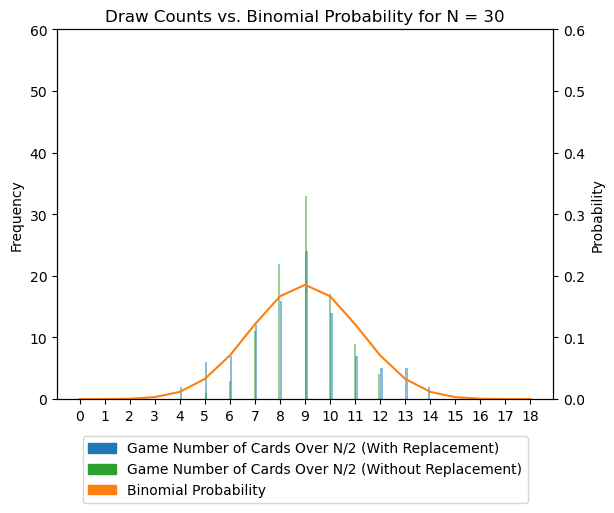

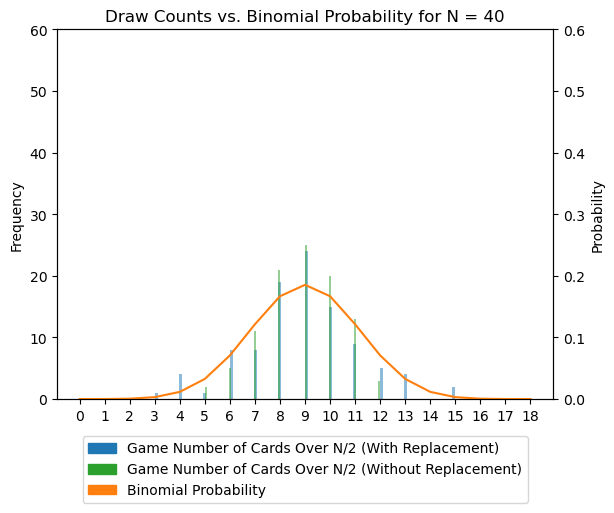

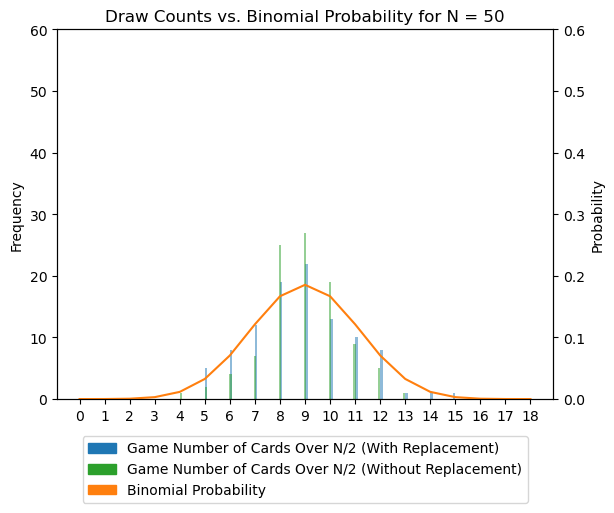

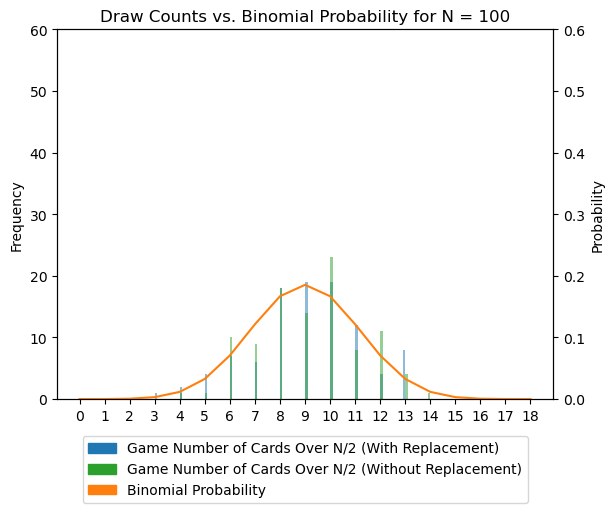

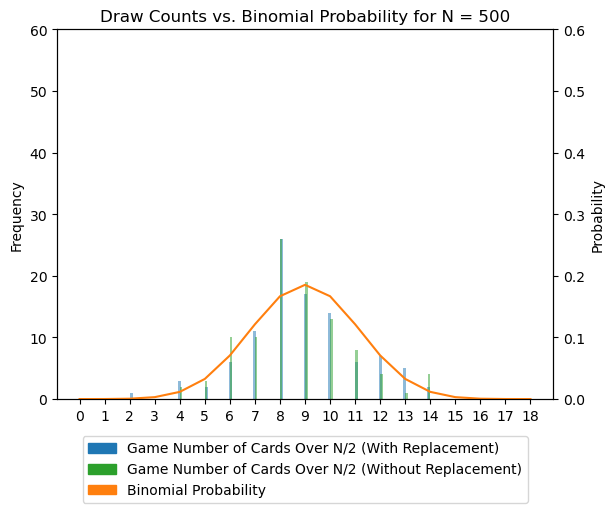

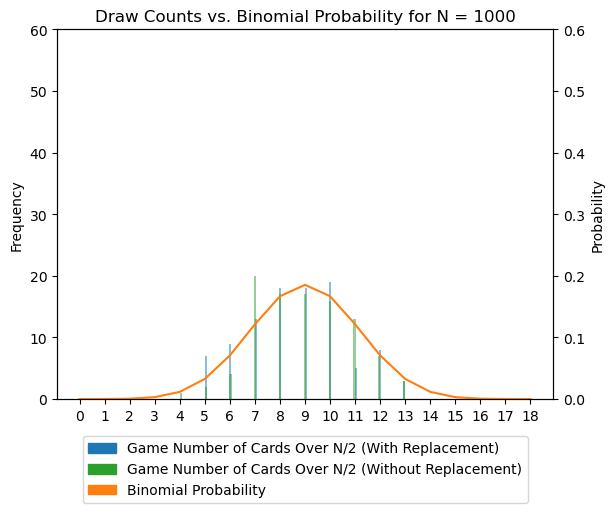

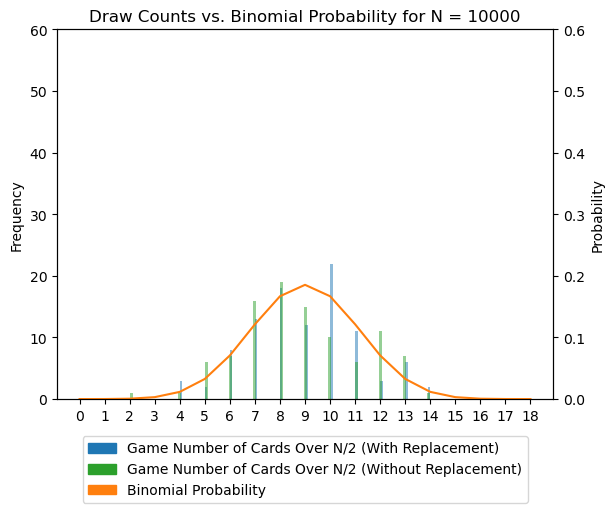

In [52]:
# Let's look at the binomial number of cards over N/2 with and without replacement

# Values of N to loop through
growing_N = [20, 25, 30, 40, 50, 100, 500, 1000, 10000]

# Loop over N
for N in growing_N:
    # Storing number of cards over N/2 for each game
    num_cards_over_without_replacement = []
    num_cards_over_with_replacement = []
    # 100 draws
    for _ in range(100):
        # Draw without replacement
        draw_without_replacement = sample_cards(N, 6, 3)
        draw_with_replacement = sample_cards_w_replacement(N, 6, 3)
        # Count cards over N/2 and add to list
        num_cards_over_without_replacement.append(len([card for card in draw_without_replacement.flatten() if card > (N / 2)]))
        num_cards_over_with_replacement.append(len([card for card in draw_with_replacement.flatten() if card > (N / 2)]))
    # Plot histograms and binomial probability
    x = range(0, 19)
    pmf = stats.binom.pmf(x, 18, 0.5)
    # Overlaid plot with two axes, appropriate labels and axis titles
    fig, ax1 = plt.subplots()
    ax1.hist(num_cards_over_with_replacement, bins = 100, color = mpl_blue, alpha = 0.5)
    ax1.hist(num_cards_over_without_replacement, bins = 100, color = mpl_green, alpha = 0.5)
    ax1.set_ylabel('Frequency')
    # We need to set ylim for both axes to ensure they line up
    ax1.set_ylim(0, 60)
    ax2 = ax1.twinx()
    ax2.plot(x, pmf, color = mpl_orange)
    ax2.set_ylabel('Probability')
    ax2.set_ylim(0, 0.6)
    plt.xticks(range(0, 19))
    plt.title('Draw Counts vs. Binomial Probability for N = ' + str(N))
    patch_1 = mpatches.Patch(color=mpl_blue, label = 'Game Number of Cards Over N/2 (With Replacement)')
    patch_2 = mpatches.Patch(color=mpl_green, label = 'Game Number of Cards Over N/2 (Without Replacement)')
    patch_3 = mpatches.Patch(color=mpl_orange, label = 'Binomial Probability')
    plt.legend(handles=[patch_1, patch_2, patch_3], bbox_to_anchor =(0.5,-0.3), loc='lower center')
    plt.show()

For the binomial distribution of the number of cards above `N/2`, we see that the distributions converge as `N` increases. The draws without replacement initially place a large mass around `N/2` for low `N` - the cards in play are forced to be symmetric. However, as `N` increases, the distribution spreads out and converges to the same result as draws with replacement, and to the expected binomial shape.

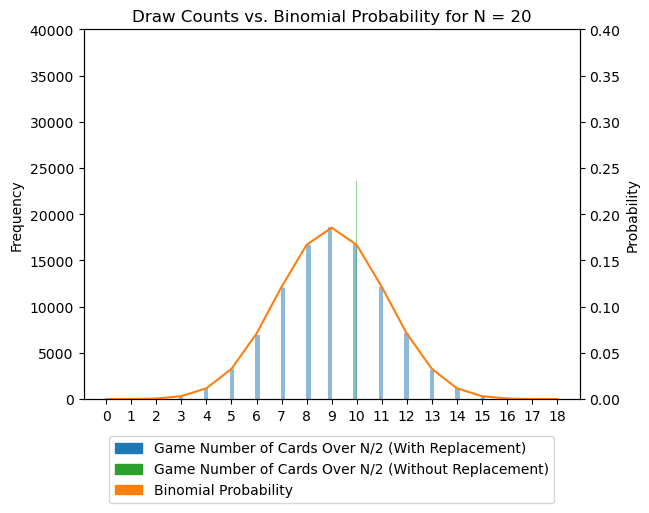

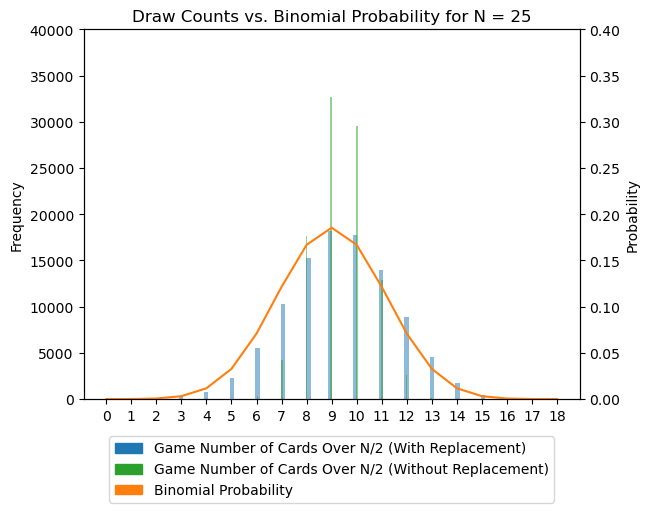

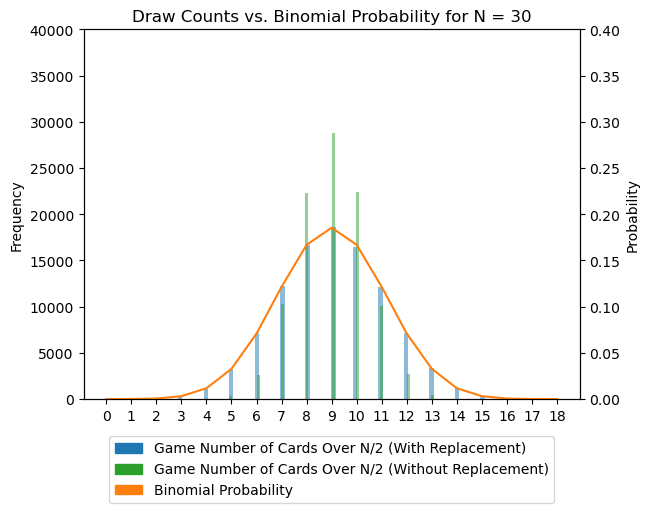

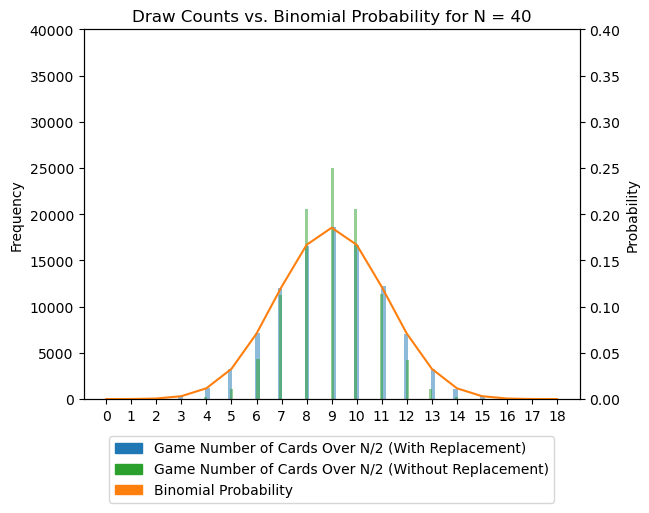

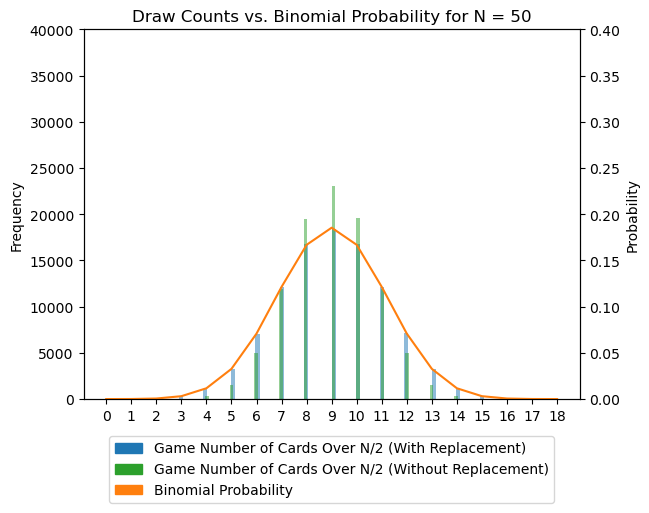

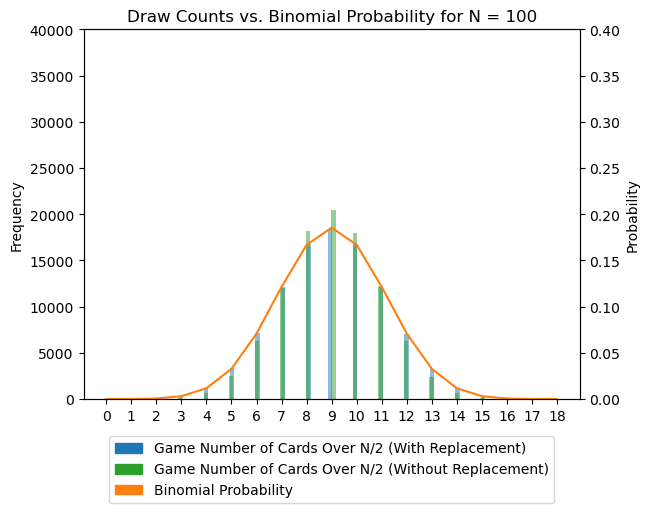

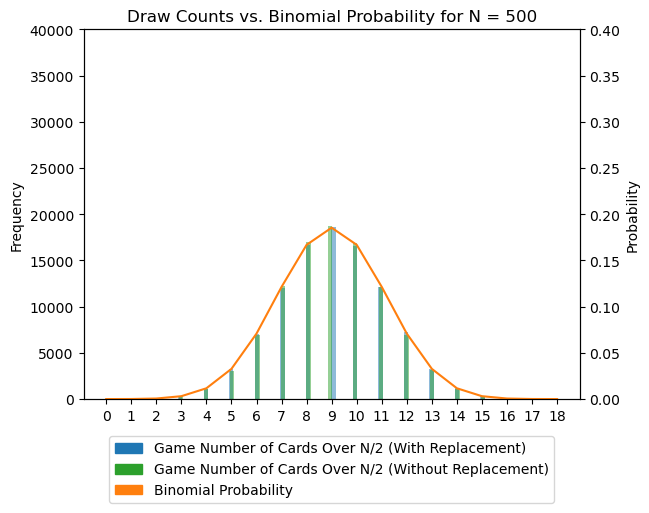

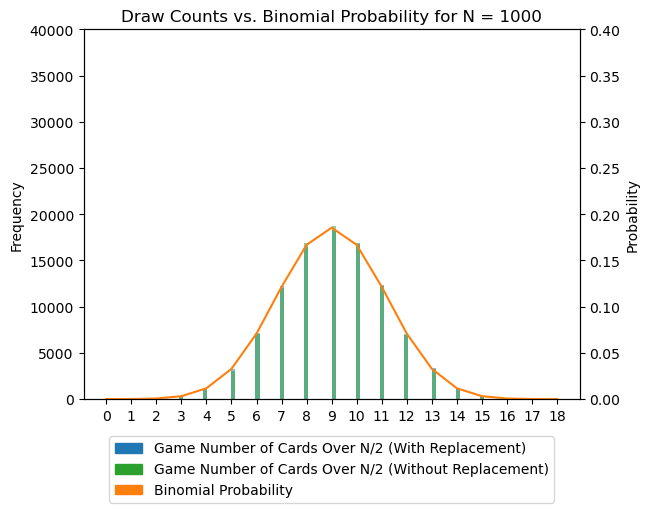

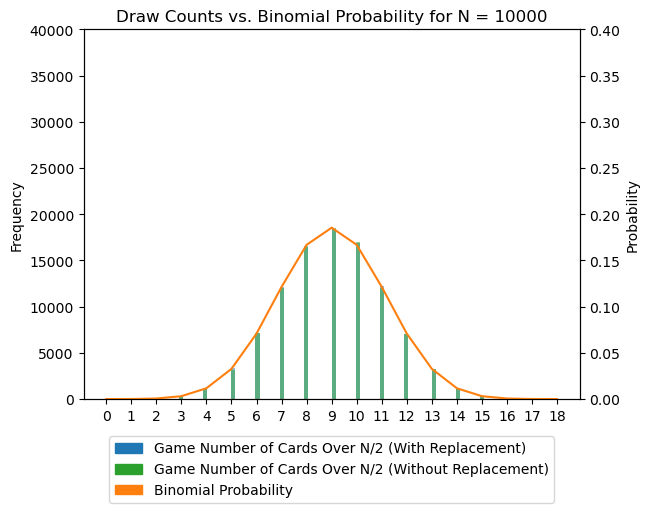

In [53]:
# Let's look at the binomial number of cards over N/2 with and without replacement

# Values of N to loop through
growing_N = [20, 25, 30, 40, 50, 100, 500, 1000, 10000]

# Loop over N
for N in growing_N:
    # Storing number of cards over N/2 for each game
    num_cards_over_without_replacement = []
    num_cards_over_with_replacement = []
    # 100K draws
    for _ in range(100000):
        # Draw without replacement
        draw_without_replacement = sample_cards(N, 6, 3)
        draw_with_replacement = sample_cards_w_replacement(N, 6, 3)
        # Count cards over N/2 and add to list
        num_cards_over_without_replacement.append(len([card for card in draw_without_replacement.flatten() if card > (N / 2)]))
        num_cards_over_with_replacement.append(len([card for card in draw_with_replacement.flatten() if card > (N / 2)]))
    # Plot histograms and binomial probability
    x = range(0, 19)
    pmf = stats.binom.pmf(x, 18, 0.5)
    # Overlaid plot with two axes, appropriate labels and axis titles
    fig, ax1 = plt.subplots()
    ax1.hist(num_cards_over_with_replacement, bins = 100, color = mpl_blue, alpha = 0.5, histtype='stepfilled')
    ax1.hist(num_cards_over_without_replacement, bins = 100, color = mpl_green, alpha = 0.5, histtype='stepfilled')
    ax1.set_ylabel('Frequency')
    # We need to set ylim for both axes to ensure they line up
    ax1.set_ylim(0, 40000)
    ax2 = ax1.twinx()
    ax2.plot(x, pmf, color = mpl_orange)
    ax2.set_ylabel('Probability')
    ax2.set_ylim(0, 0.4)
    plt.xticks(range(0, 19))
    plt.title('Draw Counts vs. Binomial Probability for N = ' + str(N))
    patch_1 = mpatches.Patch(color=mpl_blue, label = 'Game Number of Cards Over N/2 (With Replacement)')
    patch_2 = mpatches.Patch(color=mpl_green, label = 'Game Number of Cards Over N/2 (Without Replacement)')
    patch_3 = mpatches.Patch(color=mpl_orange, label = 'Binomial Probability')
    plt.legend(handles=[patch_1, patch_2, patch_3], bbox_to_anchor =(0.5,-0.3), loc='lower center')
    plt.show()

### Contribution statement

Please include a list of the students you worked with during this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Isaac Liu (ijyliu)
- Member No2: Soren Rajani (SorenRajani)
- Member No3: